In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('household_data_1min_singleindex_residential3.csv')

data

C:\Users\kunal\AppData\Local\Temp\ipykernel_34584\418546840.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('household_data_1min_singleindex_residential3.csv')


,utc_timestamp,cet_cest_timestamp,interpolated,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,DE_KN_residential3_washing_machine
0,2014-12-11T17:59:00Z,2014-12-11T18:59:00+0100,NaN,NaN,0.00000,0.001567,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,0.00000,0.003133,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T18:01:00Z,2014-12-11T19:01:00+0100,NaN,NaN,0.00000,0.005800,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T18:02:00Z,2014-12-11T19:02:00+0100,NaN,NaN,0.00000,0.006900,NaN,NaN,NaN,NaN,0.0
4,2014-12-11T18:03:00Z,2014-12-11T19:03:00+0100,NaN,0.0005,0.00025,0.008000,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2307128,2019-05-01T22:07:00Z,2019-05-02T00:07:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307129,2019-05-01T22:08:00Z,2019-05-02T00:08:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307130,2019-05-01T22:09:00Z,2019-05-02T00:09:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2307131,2019-05-01T22:10:00Z,2019-05-02T00:10:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
columns_to_remove = [
    'cet_cest_timestamp',
    'interpolated',
    'DE_KN_residential4_dishwasher',
    'DE_KN_residential4_ev',
    'DE_KN_residential4_freezer',
    'DE_KN_residential4_grid_export',
    'DE_KN_residential4_grid_import',
    'DE_KN_residential4_heat_pump',
    'DE_KN_residential4_pv',
    'DE_KN_residential4_refrigerator',
    'DE_KN_residential4_washing_machine',
    'DE_KN_residential6_circulation_pump',
    'DE_KN_residential6_dishwasher',
    'DE_KN_residential6_freezer',
    'DE_KN_residential6_grid_export',
    'DE_KN_residential6_grid_import',
    'DE_KN_residential6_pv',
    'DE_KN_residential6_washing_machine'
]

data = data.drop(columns=columns_to_remove, errors='ignore')


In [37]:
for column in data.columns:
    print(column)

utc_timestamp
DE_KN_residential3_circulation_pump
DE_KN_residential3_dishwasher
DE_KN_residential3_freezer
DE_KN_residential3_grid_export
DE_KN_residential3_grid_import
DE_KN_residential3_pv
DE_KN_residential3_refrigerator
DE_KN_residential3_washing_machine


In [38]:
rename_columns = {
    'DE_KN_residential3_circulation_pump': 'circulation_pump',
    'DE_KN_residential3_dishwasher': 'dishwasher',
    'DE_KN_residential3_freezer': 'freezer',
    'DE_KN_residential3_grid_export': 'grid_export',
    'DE_KN_residential3_grid_import': 'grid_import',
    'DE_KN_residential3_pv': 'pv',
    'DE_KN_residential3_refrigerator': 'refrigerator',
    'DE_KN_residential6_washing_machine': 'washing_machine'
}

data = data.rename(columns=rename_columns)

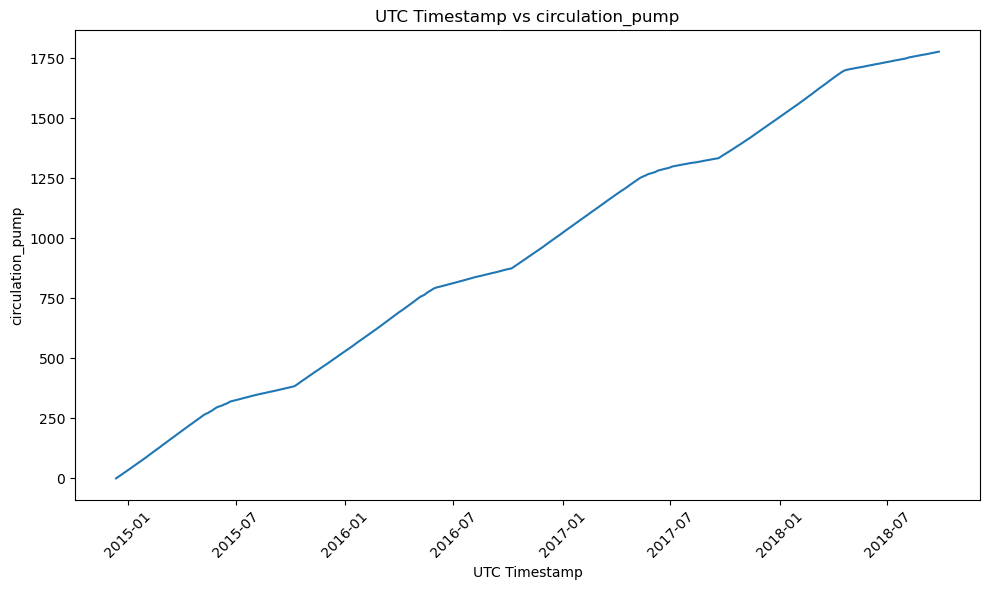

KeyboardInterrupt: 

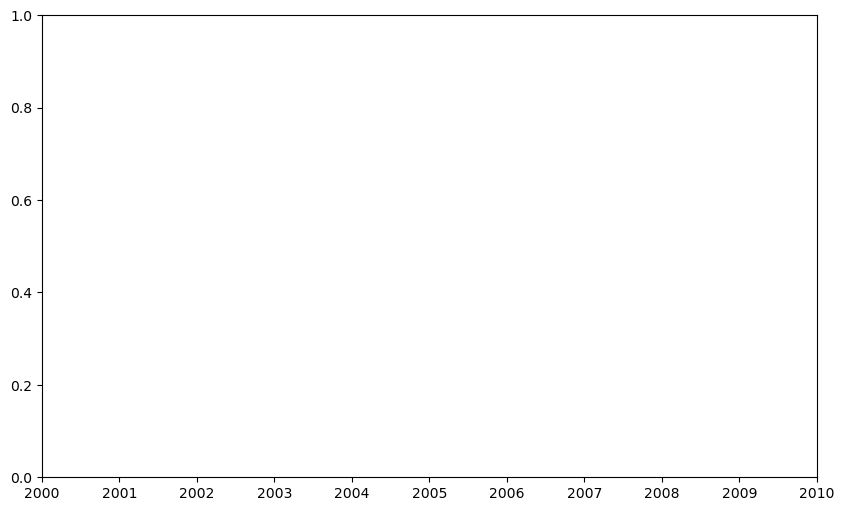

In [39]:
columns_to_plot = [
    'circulation_pump',
    'dishwasher',
    'freezer',
    'grid_export',
    'grid_import',
    'pv',
    'refrigerator',
    'DE_KN_residential3_washing_machine'
]

# Convert 'utc_timestamp' to datetime if it's not already
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])

# Creating plots
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(data['utc_timestamp'], data[column])
    plt.title(f'UTC Timestamp vs {column}')
    plt.xlabel('UTC Timestamp')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [40]:
import numpy as np
cumulative_columns = data.select_dtypes(include=[np.number]).columns

non_cumulative_data = data.copy()
for column in cumulative_columns:
    non_cumulative_data[column] = non_cumulative_data[column].diff().fillna(0)

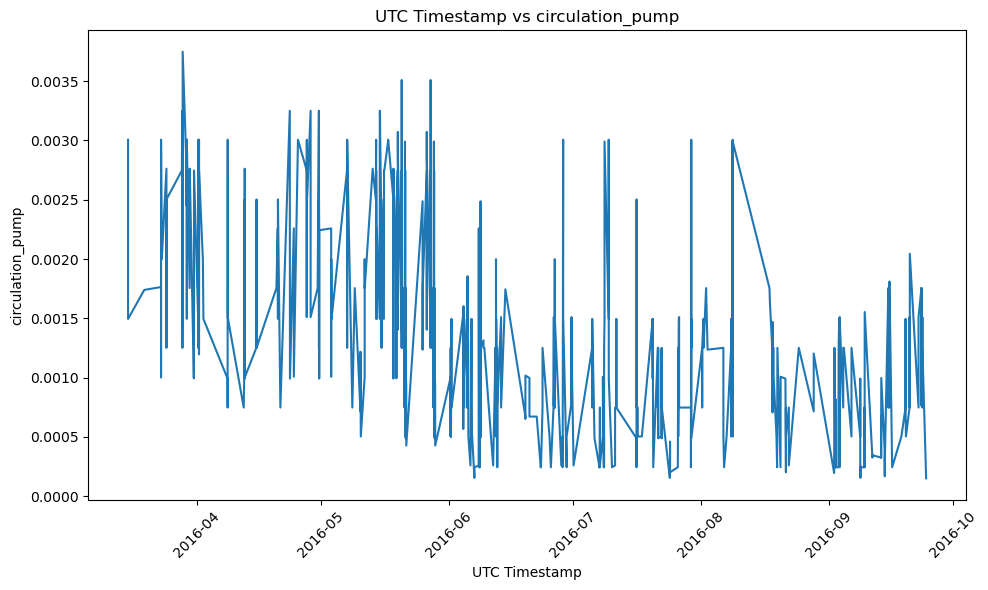

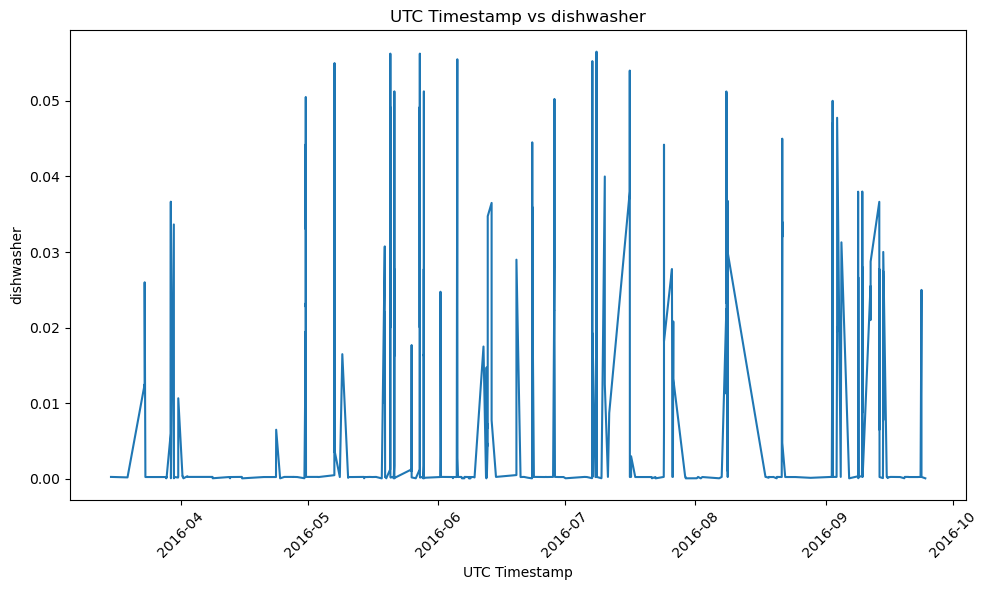

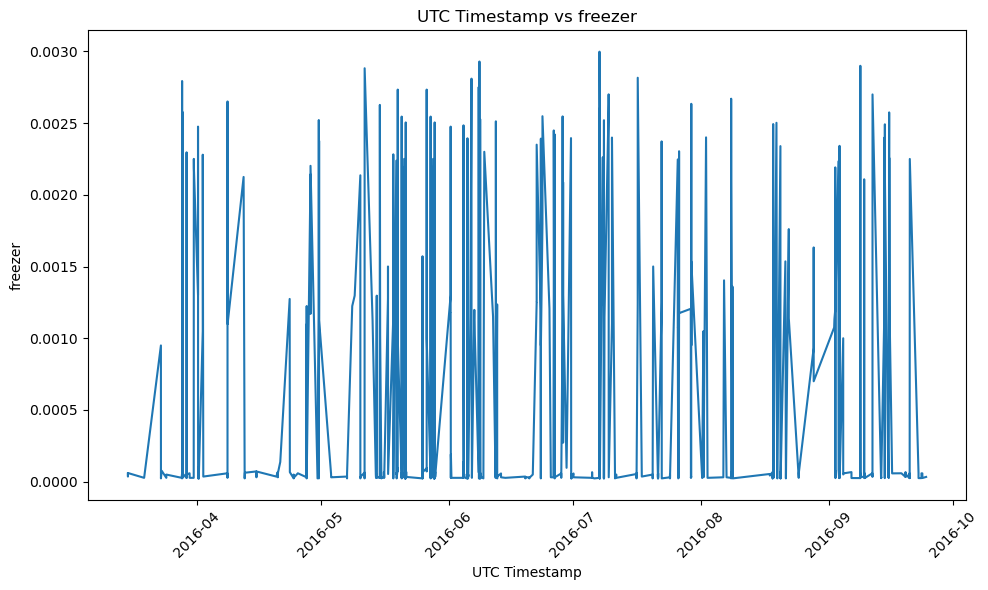

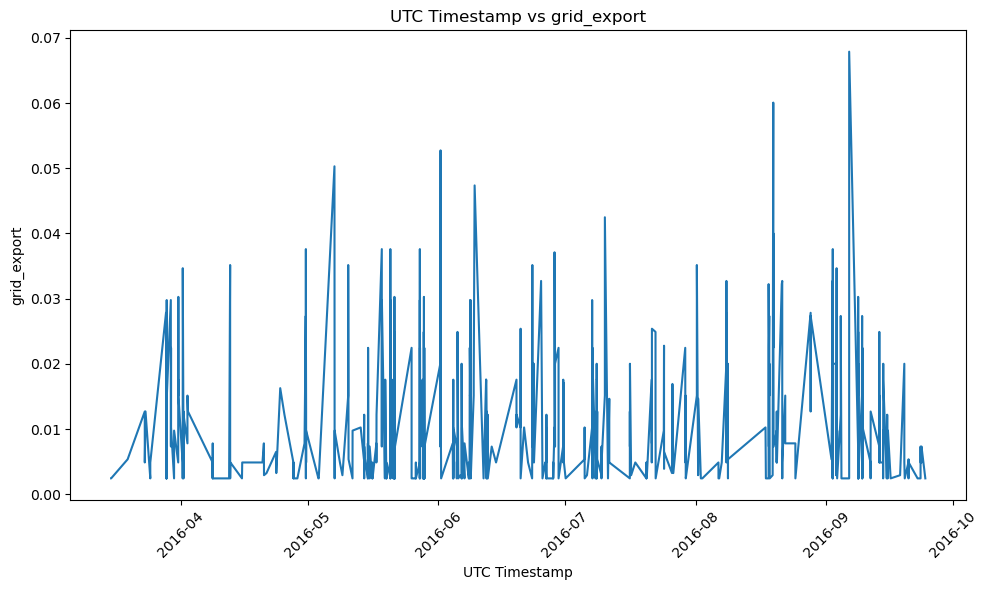

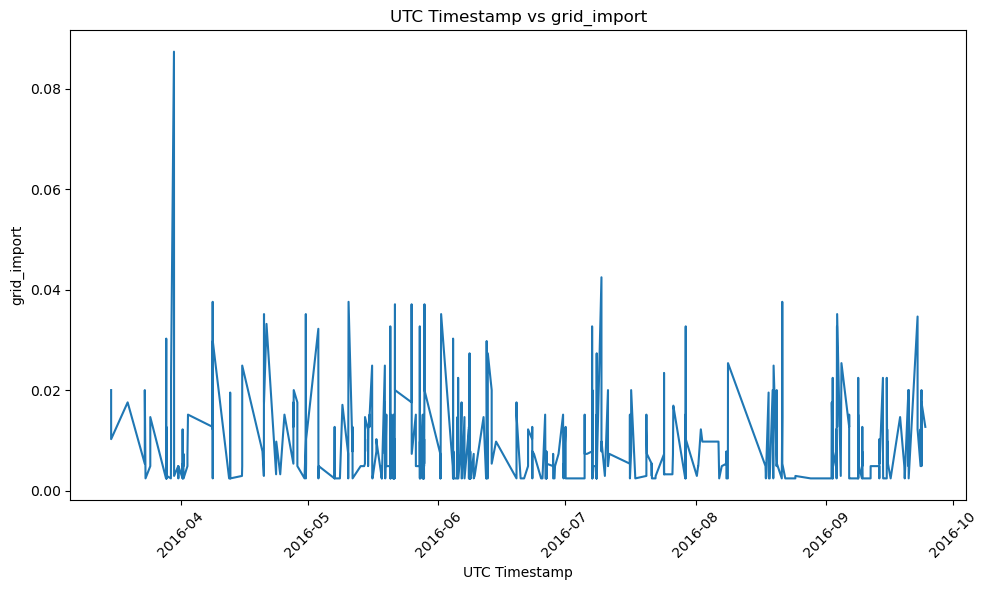

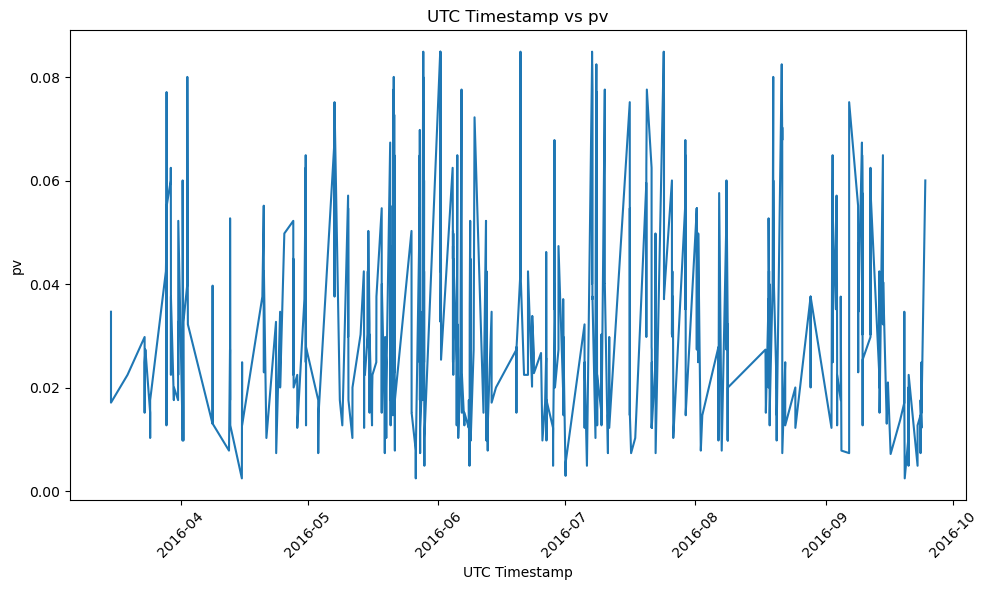

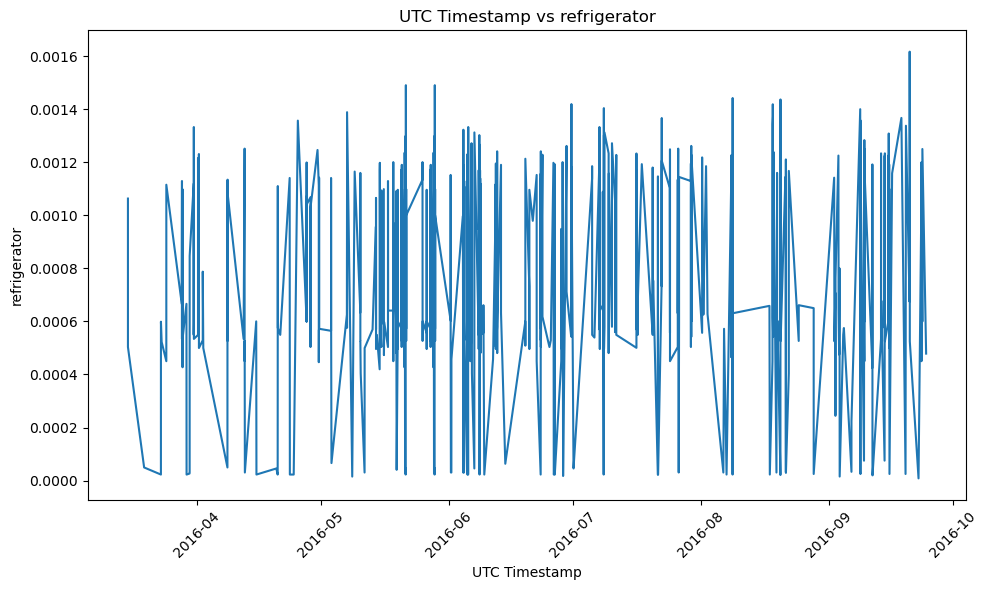

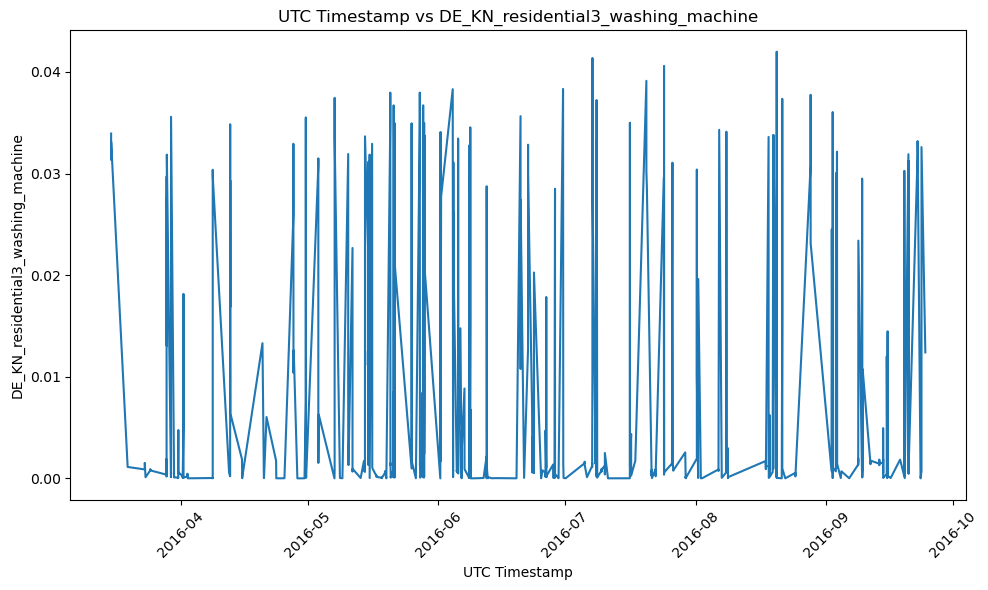

In [41]:
columns_to_plot = [
    'circulation_pump',
    'dishwasher',
    'freezer',
    'grid_export',
    'grid_import',
    'pv',
    'refrigerator',
    'DE_KN_residential3_washing_machine'
]

# Convert 'utc_timestamp' to datetime if it's not already
non_cumulative_data['utc_timestamp'] = pd.to_datetime(non_cumulative_data['utc_timestamp'])
filtered_data = non_cumulative_data[(non_cumulative_data[columns_to_plot] != 0).all(axis=1)]
#filtered_data =non_cumulative_data

# Creating plots
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['utc_timestamp'],filtered_data[column])
    plt.title(f'UTC Timestamp vs {column}')
    plt.xlabel('UTC Timestamp')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [42]:
filtered_data.describe()

,circulation_pump,dishwasher,freezer,grid_export,grid_import,pv,refrigerator,DE_KN_residential3_washing_machine
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.001208,0.007362,0.000576,0.009461,0.007508,0.031864,0.000678,0.007561
std,0.000819,0.012373,0.000833,0.008463,0.007442,0.018591,0.000379,0.012010
min,0.000150,0.000065,0.000023,0.002441,0.002441,0.002441,0.000008,0.000004
25%,0.000504,0.000148,0.000031,0.002930,0.002441,0.017090,0.000504,0.000168
50%,0.001203,0.000259,0.000057,0.007324,0.004883,0.027832,0.000597,0.001160
75%,0.001511,0.011002,0.001134,0.012695,0.009766,0.042480,0.001081,0.010773
max,0.003749,0.056503,0.002998,0.067871,0.087402,0.084961,0.001617,0.041992


C:\Users\kunal\AppData\Local\Temp\ipykernel_34584\1340979983.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filtered_data1.columns, rotation=45, ha="right")


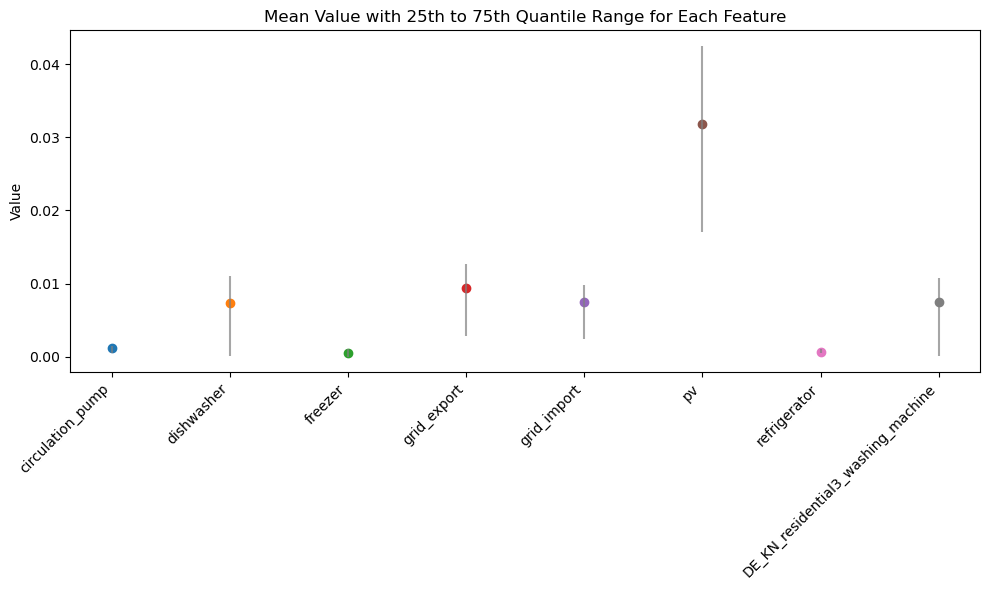

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
excluded_column = 'utc_timestamp'

filtered_data1 = filtered_data.loc[:, filtered_data.columns != excluded_column]

for column in filtered_data1.columns:
    mean_series = filtered_data1[column].mean()
    quantile25 = filtered_data1[column].quantile(0.25)
    quantile75 = filtered_data1[column].quantile(0.75)

    ax.plot([column], [mean_series], 'o', label=f'{column} mean')
    ax.vlines(column, quantile25, quantile75, color='grey', alpha=0.7, label=f'{column} 25th-75th quantile')
    
ax.set_ylabel('Value')
ax.set_xticklabels(filtered_data1.columns, rotation=45, ha="right")
ax.set_title('Mean Value with 25th to 75th Quantile Range for Each Feature')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


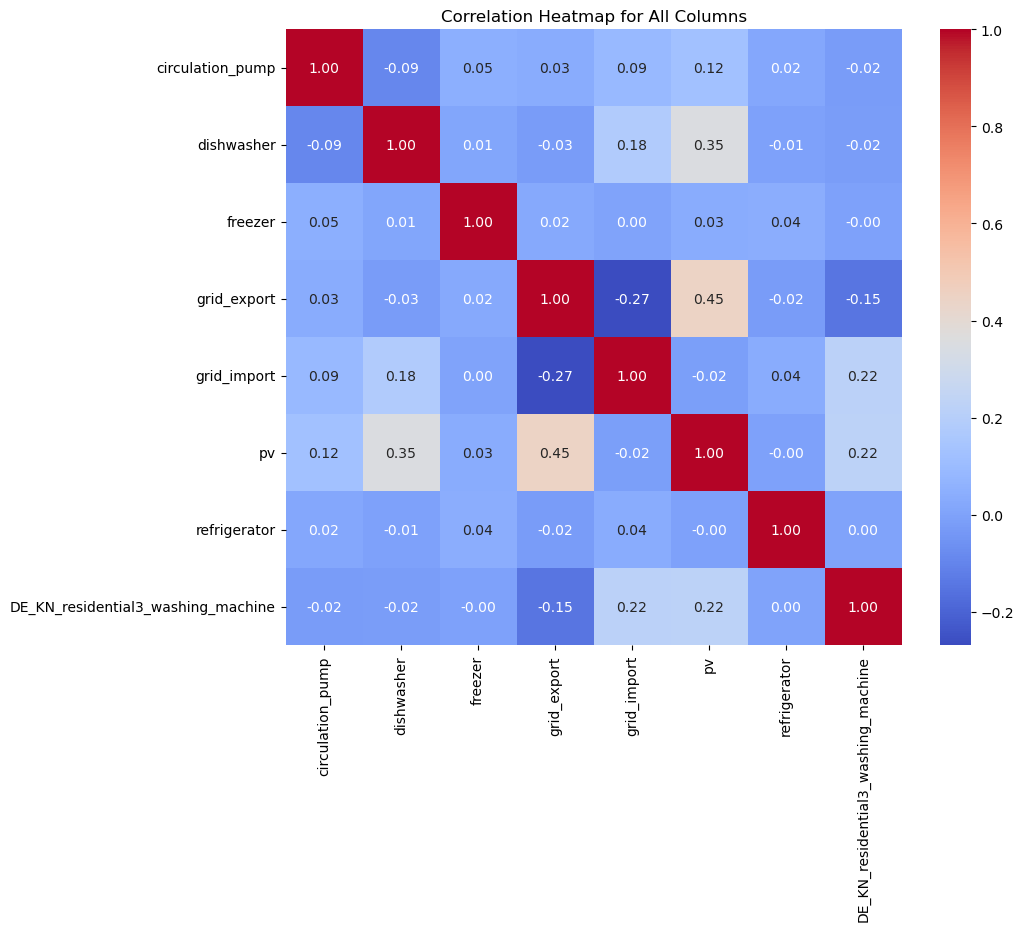

In [44]:
import seaborn as sns

corr_matrix =filtered_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap for All Columns')
plt.show()


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


'''
columns_to_plot = [
    'circulation_pump',
    'dishwasher',
    'freezer',
    'grid_export',
    'grid_import',
    'pv',
    'refrigerator',
    'DE_KN_residential3_washing_machine'
]
'''

filtered_data['utc_timestamp'] = pd.to_datetime(filtered_data['utc_timestamp'])

# Extracting features
filtered_data['hour'] = filtered_data['utc_timestamp'].dt.hour
filtered_data['minute'] = filtered_data['utc_timestamp'].dt.minute
filtered_data['weekday'] = filtered_data['utc_timestamp'].dt.weekday  # Monday=0, Sunday=6
filtered_data['is_weekend'] = filtered_data['weekday'].apply(lambda x: 1 if x >= 5 else 0) 

filtered_data['day'] = filtered_data['utc_timestamp'].dt.day
filtered_data['month'] =filtered_data['utc_timestamp'].dt.month


X = filtered_data[['grid_import', 'grid_export', 'pv', 'hour', 'minute', 'weekday','is_weekend', 'day', 'month']]
y = filtered_data['DE_KN_residential3_washing_machine']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared value: {r2}')

RMSE: 0.010857193766356976
R-squared value: 0.11604779025885403


C:\Users\kunal\AppData\Local\Temp\ipykernel_34584\1525113163.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['utc_timestamp'] = pd.to_datetime(filtered_data['utc_timestamp'])
C:\Users\kunal\AppData\Local\Temp\ipykernel_34584\1525113163.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['utc_timestamp'].dt.hour
C:\Users\kunal\AppData\Local\Temp\ipykernel_34584\1525113163.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

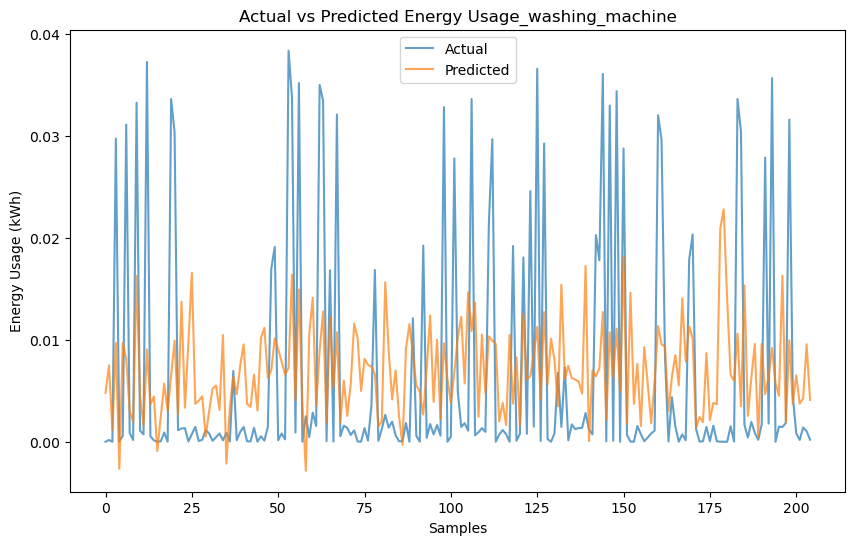

In [55]:
actual = y_test  
predicted = y_pred 
plt.figure(figsize=(10, 6))
plt.plot(actual.values, label='Actual', alpha=0.7)
plt.plot(predicted, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Energy Usage_washing_machine')
plt.xlabel('Samples')
plt.ylabel('Energy Usage (kWh)')
plt.legend()
plt.show()